## Lectura y limpieza de datos

In [41]:
import pandas as pd
import numpy as np

In [42]:
student_mat = pd.read_csv('./datasets/student-mat.csv', delimiter=';')
student_por = pd.read_csv('./datasets/student-por.csv', delimiter=';')

In [43]:
print(student_mat.shape)
print(student_por.shape)

(395, 33)
(649, 33)


In [44]:
# Ver las primeras filas de cada dataset
print(student_mat.head())
print(student_por.head())

# Obtener información sobre el tipo de datos y los valores faltantes
print(student_mat.info())
print(student_por.info())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     G

In [45]:
combined_data = pd.concat([student_mat, student_por])
# Por ejemplo, para eliminar filas con valores faltantes
combined_data.dropna(inplace=True)
combined_data.drop_duplicates(inplace=True)
print(combined_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1044 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher      10

In [46]:
print(combined_data.shape)

(1044, 33)


In [47]:
# Imprimir información sobre nulos antes de la limpieza
print("\nInformación sobre nulos")
print(combined_data.isnull().sum())


Información sobre nulos
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


## Exploracion de datos

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
print(combined_data.describe())

               age         Medu         Fedu   traveltime    studytime  \
count  1044.000000  1044.000000  1044.000000  1044.000000  1044.000000   
mean     16.726054     2.603448     2.387931     1.522989     1.970307   
std       1.239975     1.124907     1.099938     0.731727     0.834353   
min      15.000000     0.000000     0.000000     1.000000     1.000000   
25%      16.000000     2.000000     1.000000     1.000000     1.000000   
50%      17.000000     3.000000     2.000000     1.000000     2.000000   
75%      18.000000     4.000000     3.000000     2.000000     2.000000   
max      22.000000     4.000000     4.000000     4.000000     4.000000   

          failures       famrel     freetime        goout         Dalc  \
count  1044.000000  1044.000000  1044.000000  1044.000000  1044.000000   
mean      0.264368     3.935824     3.201149     3.156130     1.494253   
std       0.656142     0.933401     1.031507     1.152575     0.911714   
min       0.000000     1.000000     1

In [50]:
# Calcular correlaciones
numerical_data = combined_data.select_dtypes(include=[np.number])
corr = numerical_data.corr()
print(corr)

                 age      Medu      Fedu  traveltime  studytime  failures  \
age         1.000000 -0.130196 -0.138521    0.049216  -0.007870  0.282364   
Medu       -0.130196  1.000000  0.642063   -0.238181   0.090616 -0.187769   
Fedu       -0.138521  0.642063  1.000000   -0.196328   0.033458 -0.191390   
traveltime  0.049216 -0.238181 -0.196328    1.000000  -0.081328  0.087177   
studytime  -0.007870  0.090616  0.033458   -0.081328   1.000000 -0.152024   
failures    0.282364 -0.187769 -0.191390    0.087177  -0.152024  1.000000   
famrel      0.007162  0.015004  0.013066   -0.012578   0.012324 -0.053676   
freetime    0.002645  0.001054  0.002142   -0.007403  -0.094429  0.102679   
goout       0.118510  0.025614  0.030075    0.049740  -0.072941  0.074683   
Dalc        0.133453  0.001515 -0.000165    0.109423  -0.159665  0.116336   
Walc        0.098291 -0.029331  0.019524    0.084292  -0.229073  0.107432   
health     -0.029129 -0.013254  0.034288   -0.029002  -0.063044  0.048311   

In [51]:
# Seleccionar variables con mayor correlación
high_corr_vars = corr['G3'].drop('G3').nlargest(6).index

C:\ProgramData\anaconda3\envs\ml-pipeline\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\envs\ml-pipeline\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\envs\ml-pipeline\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


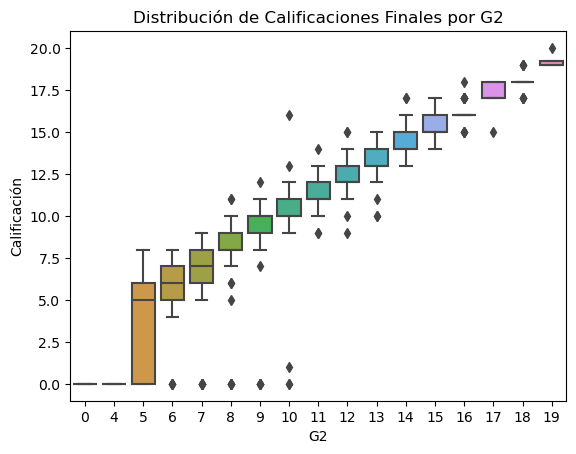

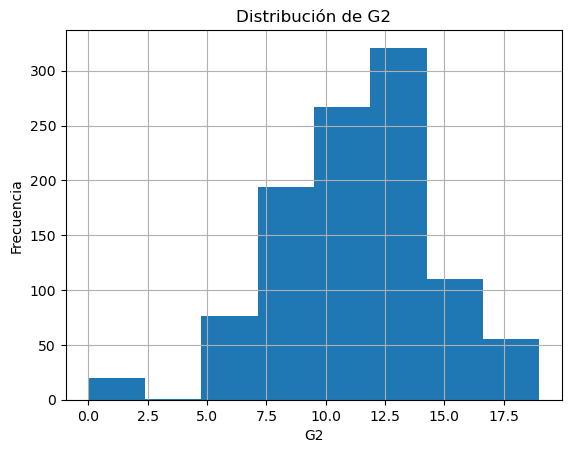

C:\ProgramData\anaconda3\envs\ml-pipeline\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\envs\ml-pipeline\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\envs\ml-pipeline\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


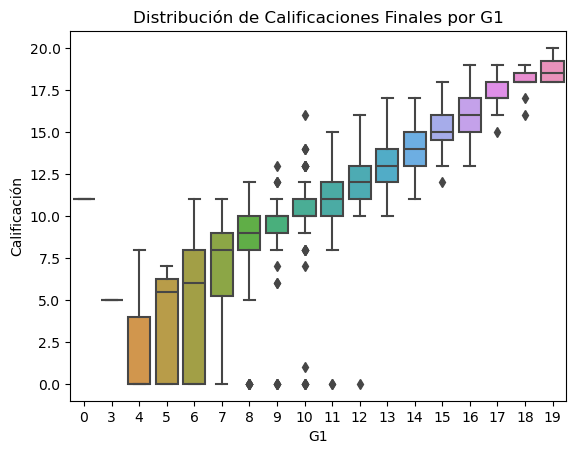

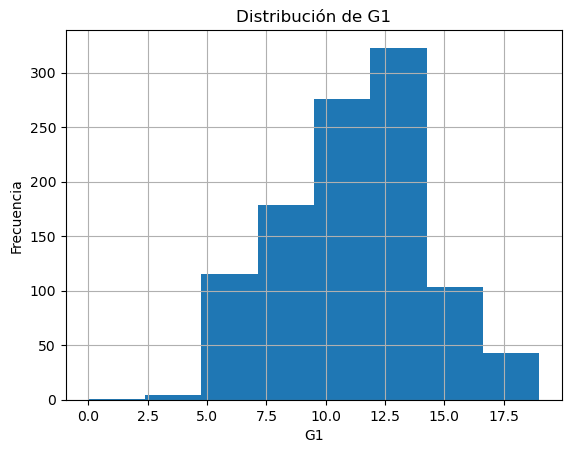

C:\ProgramData\anaconda3\envs\ml-pipeline\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\envs\ml-pipeline\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\envs\ml-pipeline\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


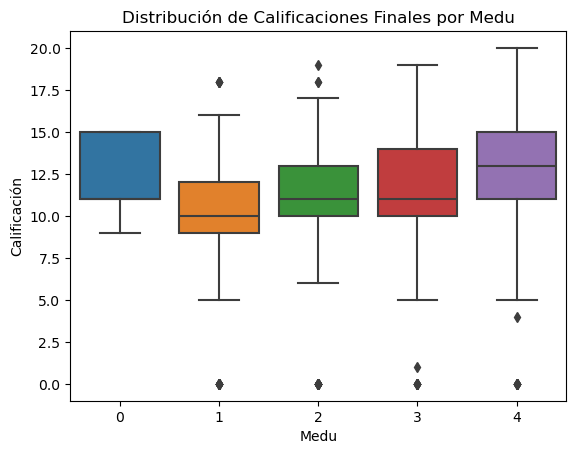

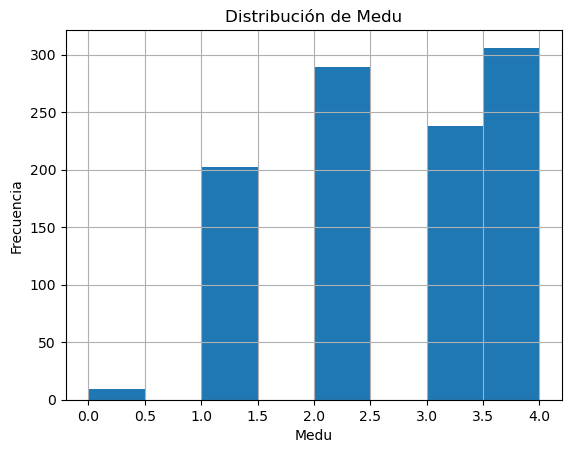

C:\ProgramData\anaconda3\envs\ml-pipeline\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\envs\ml-pipeline\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\envs\ml-pipeline\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


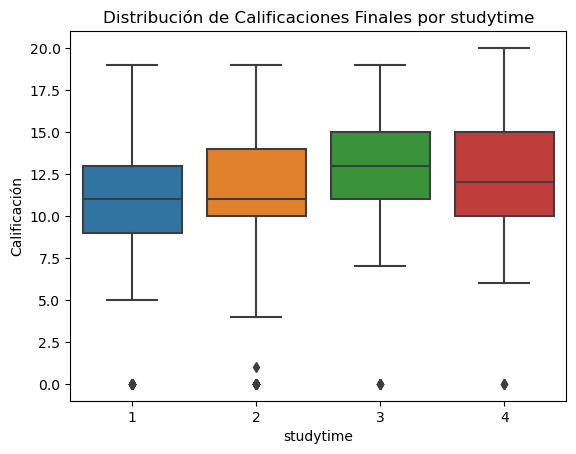

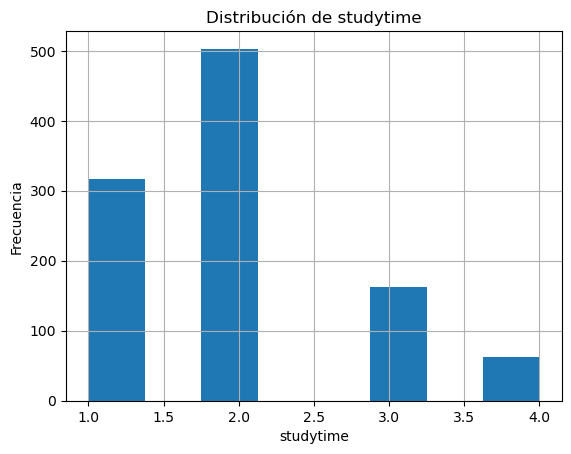

C:\ProgramData\anaconda3\envs\ml-pipeline\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\envs\ml-pipeline\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\envs\ml-pipeline\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


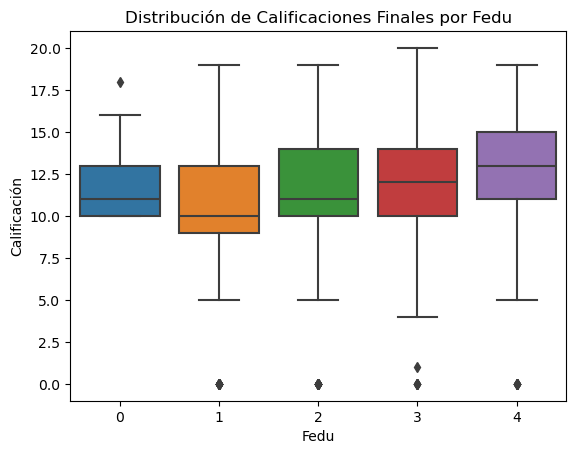

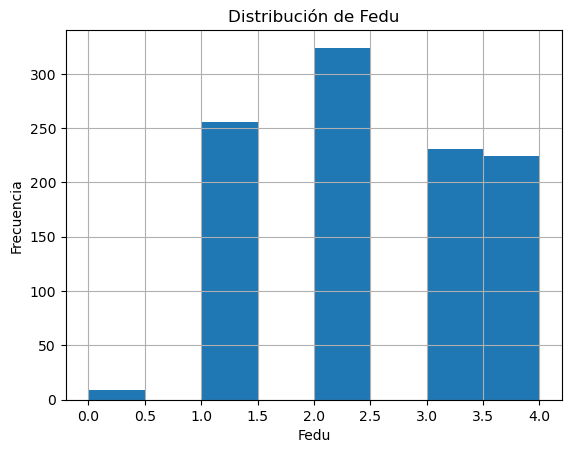

C:\ProgramData\anaconda3\envs\ml-pipeline\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\envs\ml-pipeline\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\envs\ml-pipeline\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


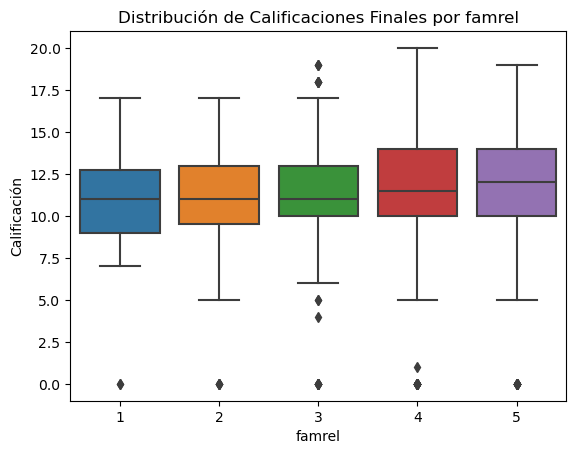

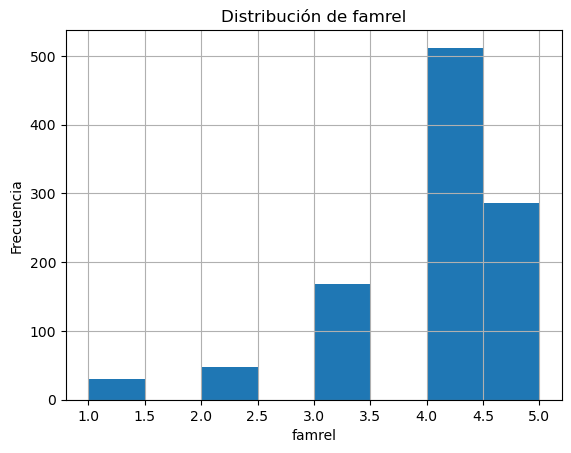

In [52]:
# Graficar boxplot, histogramas y pairplot de las variables con mayor correlación
for var in high_corr_vars:
    # Boxplot
    sns.boxplot(x=var, y='G3', data=combined_data)
    plt.title(f'Distribución de Calificaciones Finales por {var}')
    plt.xlabel(var)
    plt.ylabel('Calificación')
    plt.show()

    # Histograma
    combined_data[var].hist(bins=8)
    plt.title(f'Distribución de {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.show()

C:\ProgramData\anaconda3\envs\ml-pipeline\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\envs\ml-pipeline\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\envs\ml-pipeline\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\envs\ml-pipeline\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

C:\ProgramData\anaconda3\envs\ml-pipeline\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\envs\ml-pipeline\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\envs\ml-pipeline\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\envs\ml-pipeline\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

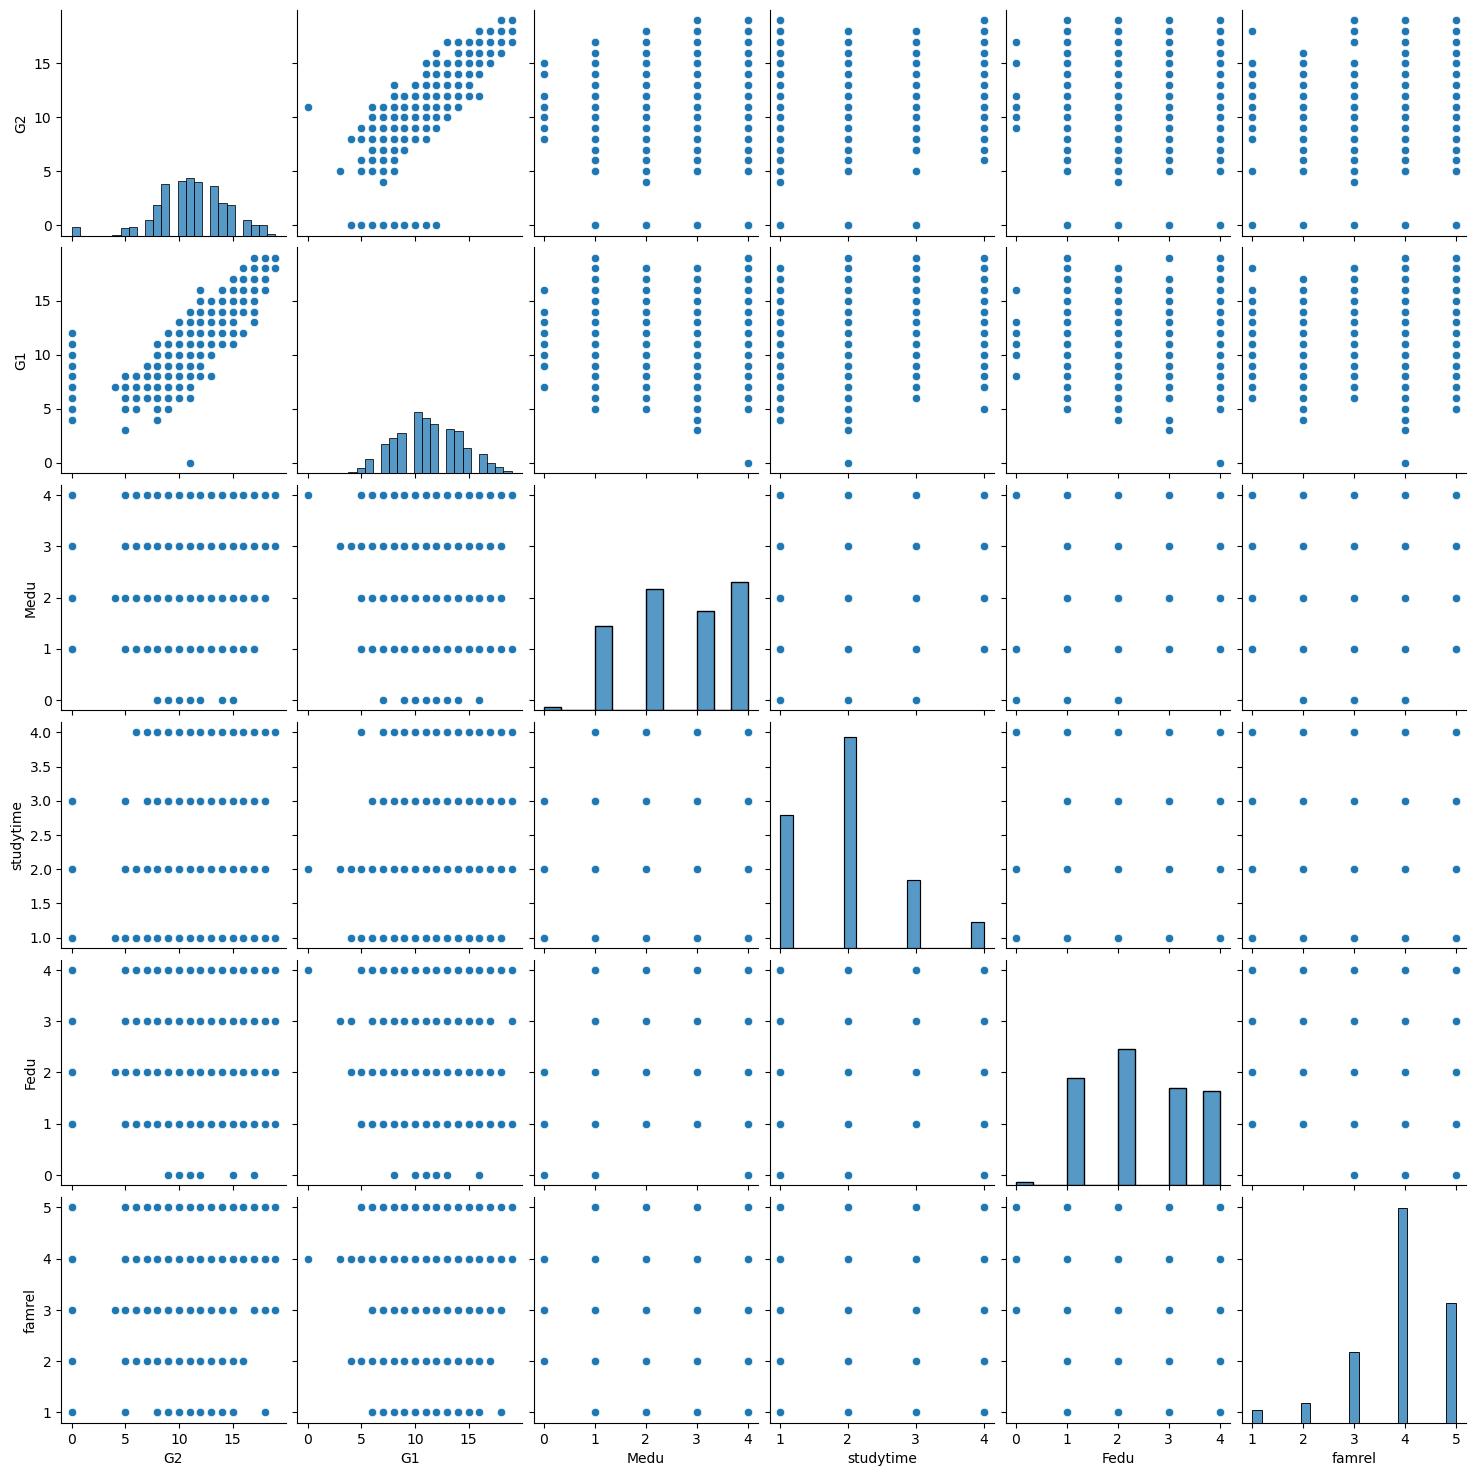

In [53]:
# Pairplot
sns.pairplot(combined_data[high_corr_vars])
plt.show()

   ## Modelado y entrenamiento

In [54]:
from azure.ai.ml import automl, Input, MLClient
from azure.ai.ml.entities import ResourceConfiguration
from azure.identity import DefaultAzureCredential
from azure.ai.ml.constants import AssetTypes
from dotenv import load_dotenv
from sklearn.model_selection import train_test_split
import pandas as pd
import mlflow
from mlflow.tracking.client import MlflowClient
from mlflow.artifacts import download_artifacts

In [55]:
#Omitir este paso en azure
print("Cargar username/pass desde archivo .env")
load_dotenv("env.txt", override=True)

Cargar username/pass desde archivo .env


True

In [56]:
credential = DefaultAzureCredential()
ml_client = MLClient.from_config(credential=credential)
#Omitir este paso en azure
credential.get_token("https://management.azure.com/.default")

Found the config file in: .\config.json


AccessToken(token='eyJ0eXAiOiJKV1QiLCJhbGciOiJSUzI1NiIsIng1dCI6IlQxU3QtZExUdnlXUmd4Ql82NzZ1OGtyWFMtSSIsImtpZCI6IlQxU3QtZExUdnlXUmd4Ql82NzZ1OGtyWFMtSSJ9.eyJhdWQiOiJodHRwczovL21hbmFnZW1lbnQuYXp1cmUuY29tIiwiaXNzIjoiaHR0cHM6Ly9zdHMud2luZG93cy5uZXQvY2MyODYzM2YtMTJiOC00NmNiLWJjMTUtOTUxZGFlMjM5YjRkLyIsImlhdCI6MTcwMTcwMzQxNSwibmJmIjoxNzAxNzAzNDE1LCJleHAiOjE3MDE3MDczMTUsImFpbyI6IkUyVmdZS2gvNTdWN0I4dDlBU1duNTFJWHduSktBQT09IiwiYXBwaWQiOiJhMjcwZGI3OC1lODMwLTQxZTYtOTY5My1kMjg2N2I2ZWI4NWYiLCJhcHBpZGFjciI6IjEiLCJpZHAiOiJodHRwczovL3N0cy53aW5kb3dzLm5ldC9jYzI4NjMzZi0xMmI4LTQ2Y2ItYmMxNS05NTFkYWUyMzliNGQvIiwiaWR0eXAiOiJhcHAiLCJvaWQiOiJkY2VmMmQ2OS03NDAzLTRlYWUtODJmYy0yM2U0MjhmZjA5MmUiLCJyaCI6IjAuQVFvQVAyTW96TGdTeTBhOEZaVWRyaU9iVFVaSWYza0F1dGRQdWtQYXdmajJNQk1LQUFBLiIsInN1YiI6ImRjZWYyZDY5LTc0MDMtNGVhZS04MmZjLTIzZTQyOGZmMDkyZSIsInRpZCI6ImNjMjg2MzNmLTEyYjgtNDZjYi1iYzE1LTk1MWRhZTIzOWI0ZCIsInV0aSI6Ilk1UHBXSUxpTjAtSlVDR1diMjhmQUEiLCJ2ZXIiOiIxLjAiLCJ4bXNfY2FlIjoiMSIsInhtc190Y2R0IjoxNDY1ODQ5MzEyfQ.Qy3BZTmstP4sCyA1b

In [57]:
def get_comput_target(ml_client, name="cpu-cluster", family='Standard_DS2_v2'):
    cpu_compute_target = name
    
    try:
        # let's see if the compute target already exists
        cpu_cluster = ml_client.compute.get(cpu_compute_target)
    except Exception:
        cpu_cluster = AmlCompute(
            name=cpu_compute_target,
            type="amlcompute",
            size=family,
            min_instances=0,
            max_instances=4,
            idle_time_before_scale_down=180,
            tier="Dedicated",
        )
    
        cpu_cluster = ml_client.compute.begin_create_or_update(cpu_cluster).result()
compute_target = get_comput_target(ml_client)

### Split de datos de evaluacion y entrenamiento

In [58]:
# Divide el dataframe en conjuntos de entrenamiento y validación
train_df, valid_df = train_test_split(combined_data, test_size=0.2, random_state=42)
# Convertir los dataframes de entrenamiento y validación de nuevo a datasets de Azure para usarlos más adelante
# Para ello, primero tendrías que guardar los dataframes como CSV y luego subirlos a tu datastore
train_df.to_csv('./train_data/train_data.csv', index=False)
valid_df.to_csv('./validation_data/valid_data.csv', index=False)

In [59]:
import mltable

train_path = [
    {
        "file": "train_data.csv"
    }
]

train_data_mltable = mltable.from_delimited_files(paths=train_path)
train_data_mltable.save("./train_data")

validation_path = [
    {
        "file": "valid_data.csv"
    }
]

validation_data_mltable = mltable.from_delimited_files(paths=validation_path)
validation_data_mltable.save("./validation_data")

print(train_data_mltable)
print(validation_data_mltable)

paths:
- file: file://C:\Users\ASUS TUF DASH F15\Desktop\PROYECTO FINAL\train_data.csv
transformations:
- read_delimited:
    delimiter: ','
    empty_as_string: false
    encoding: utf8
    header: all_files_same_headers
    include_path_column: false
    infer_column_types: true
    partition_size: 20971520
    path_column: Path
    support_multi_line: false
type: mltable

paths:
- file: file://C:\Users\ASUS TUF DASH F15\Desktop\PROYECTO FINAL\valid_data.csv
transformations:
- read_delimited:
    delimiter: ','
    empty_as_string: false
    encoding: utf8
    header: all_files_same_headers
    include_path_column: false
    infer_column_types: true
    partition_size: 20971520
    path_column: Path
    support_multi_line: false
type: mltable



In [60]:
# Cargamos los datos (previamente separados) a un MLTable
train_mltable_path = "./train_data/" 
valid_mltable_path = "./validation_data/" 

# Define los inputs de MLTable
train_data_input = Input(type=AssetTypes.MLTABLE, path=train_mltable_path)
valid_data_input = Input(type=AssetTypes.MLTABLE, path=valid_mltable_path)

### Evaluacion de los modelos de regresion

In [61]:
# Configuramos el job de AutoML para regresión
experiment_name = 'regression-student-performance'
automl_job = automl.regression(
    experiment_name=experiment_name,
    training_data=train_data_input,
    validation_data=valid_data_input,
    target_column_name="G3",
    primary_metric="normalized_mean_absolute_error"
)

# Configura límites y recursos
automl_job.resources = ResourceConfiguration(instance_type="Standard_D2_v2")  # Ejemplo de instancia
automl_job.set_limits(timeout_minutes=30, max_trials=30)

# Autenticación y envío del job
credential = DefaultAzureCredential()
ml_client = MLClient.from_config(credential)
regression_job = ml_client.jobs.create_or_update(automl_job)

print(f"Job creado: {regression_job}")

Found the config file in: .\config.json


Job creado: compute: azureml:/subscriptions/ba1f7bf8-2be6-4bed-b818-c745bda74905/resourceGroups/primer_proyecto/providers/Microsoft.MachineLearningServices/workspaces/primer_proyecto/computes/
creation_context:
  created_at: '2023-12-04T15:29:10.197686+00:00'
  created_by: a270db78-e830-41e6-9693-d2867b6eb85f
  created_by_type: Application
display_name: sleepy_steelpan_0b0y7hq23k
experiment_name: regression-student-performance
id: azureml:/subscriptions/ba1f7bf8-2be6-4bed-b818-c745bda74905/resourceGroups/primer_proyecto/providers/Microsoft.MachineLearningServices/workspaces/primer_proyecto/jobs/sleepy_steelpan_0b0y7hq23k
limits:
  enable_early_termination: true
  max_concurrent_trials: 1
  max_cores_per_trial: -1
  max_nodes: 1
  max_trials: 30
  timeout_minutes: 30
  trial_timeout_minutes: 30
log_verbosity: info
name: sleepy_steelpan_0b0y7hq23k
outputs: {}
primary_metric: normalized_mean_absolute_error
properties: {}
resources:
  instance_count: 1
  instance_type: Standard_D2_v2
  pro

In [73]:
# Obtener el trabajo
job = ml_client.jobs.get(name=regression_job.name)

# Obtener la URL de seguimiento (tracking URI) de MLClient.
# Esta URL es necesaria para acceder a la información del experimento y los runs en MLflow.
MLFLOW_TRACKING_URI = ml_client.workspaces.get(
    name=ml_client.workspace_name
).mlflow_tracking_uri

print(f"URL de seguimiento de MLflow: {MLFLOW_TRACKING_URI}")

# Configurar MLflow para usar la URL de seguimiento obtenida.
mlflow.set_tracking_uri(MLFLOW_TRACKING_URI)

# Inicializar el cliente de MLflow.
mlflow_client = MlflowClient()

# Obtener el run principal del trabajo. En AutoML, este run tiene sub-runs para cada modelo probado.
mlflow_parent_run = mlflow_client.get_run(job.name)

# Del run principal, extraer el ID del mejor sub-run (mejor modelo probado por AutoML).
best_child_run_id = mlflow_parent_run.data.tags["automl_best_child_run_id"]

# Usar el ID del mejor sub-run para obtener toda la información sobre ese run.
regression_best_run = mlflow_client.get_run(best_child_run_id)

# Mostrar la información del mejor run.
print(regression_best_run)

URL de seguimiento de MLflow: azureml://eastus2.api.azureml.ms/mlflow/v1.0/subscriptions/ba1f7bf8-2be6-4bed-b818-c745bda74905/resourceGroups/primer_proyecto/providers/Microsoft.MachineLearningServices/workspaces/primer_proyecto
<Run: data=<RunData: metrics={'explained_variance': 0.8041562126438073,
 'mean_absolute_error': 1.0070825810692687,
 'mean_absolute_percentage_error': 11.467334484286518,
 'median_absolute_error': 0.6643795297199162,
 'normalized_mean_absolute_error': 0.05035412905346344,
 'normalized_median_absolute_error': 0.03321897648599581,
 'normalized_root_mean_squared_error': 0.08701301557320273,
 'normalized_root_mean_squared_log_error': nan,
 'r2_score': 0.8041173557856025,
 'root_mean_squared_error': 1.7402603114640547,
 'root_mean_squared_log_error': nan,
 'spearman_correlation': 0.9477411733158994}, params={}, tags={'mlflow.parentRunId': 'sleepy_steelpan_0b0y7hq23k',
 'mlflow.rootRunId': 'sleepy_steelpan_0b0y7hq23k',
 'mlflow.runName': 'hungry_pig_9cgpy29b',
 'mlflo

### Evaluacion de los modelos de clasificacion

In [62]:
# Configuramos el job de AutoML para regresión
experiment_name = 'classification-student-performance'
automl_job = automl.classification(
    experiment_name=experiment_name,
    training_data=train_data_input,
    validation_data=valid_data_input,
    target_column_name="G3",
    primary_metric="accuracy"
)

# Configura límites y recursos
automl_job.resources = ResourceConfiguration(instance_type="Standard_D2_v2")  # Ejemplo de instancia
automl_job.set_limits(timeout_minutes=30, max_trials=30)

# Autenticación y envío del job
credential = DefaultAzureCredential()
ml_client = MLClient.from_config(credential)
classification_job = ml_client.jobs.create_or_update(automl_job)

print(f"Job creado: {classification_job}")

Found the config file in: .\config.json


Job creado: compute: azureml:/subscriptions/ba1f7bf8-2be6-4bed-b818-c745bda74905/resourceGroups/primer_proyecto/providers/Microsoft.MachineLearningServices/workspaces/primer_proyecto/computes/
creation_context:
  created_at: '2023-12-04T15:29:31.179694+00:00'
  created_by: a270db78-e830-41e6-9693-d2867b6eb85f
  created_by_type: Application
display_name: khaki_crowd_dv0pk23m3j
experiment_name: classification-student-performance
id: azureml:/subscriptions/ba1f7bf8-2be6-4bed-b818-c745bda74905/resourceGroups/primer_proyecto/providers/Microsoft.MachineLearningServices/workspaces/primer_proyecto/jobs/khaki_crowd_dv0pk23m3j
limits:
  enable_early_termination: true
  max_concurrent_trials: 1
  max_cores_per_trial: -1
  max_nodes: 1
  max_trials: 30
  timeout_minutes: 30
  trial_timeout_minutes: 30
log_verbosity: info
name: khaki_crowd_dv0pk23m3j
outputs: {}
primary_metric: accuracy
properties: {}
resources:
  instance_count: 1
  instance_type: Standard_D2_v2
  properties: {}
  shm_size: 2g
ser

In [74]:
# Obtener el trabajo
job = ml_client.jobs.get(name=classification_job.name)

# Obtener la URL de seguimiento (tracking URI) de MLClient.
# Esta URL es necesaria para acceder a la información del experimento y los runs en MLflow.
MLFLOW_TRACKING_URI = ml_client.workspaces.get(
    name=ml_client.workspace_name
).mlflow_tracking_uri

print(f"URL de seguimiento de MLflow: {MLFLOW_TRACKING_URI}")

# Configurar MLflow para usar la URL de seguimiento obtenida.
mlflow.set_tracking_uri(MLFLOW_TRACKING_URI)

# Inicializar el cliente de MLflow.
mlflow_client = MlflowClient()

# Obtener el run principal del trabajo. En AutoML, este run tiene sub-runs para cada modelo probado.
mlflow_parent_run = mlflow_client.get_run(job.name)

# Del run principal, extraer el ID del mejor sub-run (mejor modelo probado por AutoML).
best_child_run_id = mlflow_parent_run.data.tags["automl_best_child_run_id"]

# Usar el ID del mejor sub-run para obtener toda la información sobre ese run.
best_run = mlflow_client.get_run(best_child_run_id)

# Mostrar la información del mejor run.
print(best_run)

URL de seguimiento de MLflow: azureml://eastus2.api.azureml.ms/mlflow/v1.0/subscriptions/ba1f7bf8-2be6-4bed-b818-c745bda74905/resourceGroups/primer_proyecto/providers/Microsoft.MachineLearningServices/workspaces/primer_proyecto
<Run: data=<RunData: metrics={'AUC_macro': 0.8983470632609631,
 'AUC_micro': 0.939321444106133,
 'AUC_weighted': 0.9072082034239283,
 'accuracy': 0.507177033492823,
 'average_precision_score_macro': 0.39032935140098646,
 'average_precision_score_micro': 0.43488738743668415,
 'average_precision_score_weighted': 0.4567199632265222,
 'balanced_accuracy': 0.35800016976487564,
 'f1_score_macro': 0.3411167920535282,
 'f1_score_micro': 0.507177033492823,
 'f1_score_weighted': 0.46133341822769364,
 'log_loss': 1.8784187718363219,
 'matthews_correlation': 0.4596880893680724,
 'norm_macro_recall': 0.31787518037518037,
 'precision_score_macro': 0.3434982174688057,
 'precision_score_micro': 0.507177033492823,
 'precision_score_weighted': 0.4466034749407955,
 'recall_score_m

## Deploy del mejor modelo

In [30]:
# import required libraries
from azure.ai.ml.entities import (
    ManagedOnlineEndpoint,
    ManagedOnlineDeployment,
    Model
)

# Creando un nombre de endpoint único con la fecha y hora actuales para evitar conflictos
import datetime

# Creando un nombre de endpoint único con la fecha y hora actuales para evitar conflictos
online_endpoint_name = "reg-" + datetime.datetime.now().strftime("%m%d%H%M")

# verificar la longitud del nombre del endpoint
assert 3 <= len(online_endpoint_name) <= 32, "El nombre del endpoint no cumple con la longitud requerida."

# crear un endpoint en línea
endpoint = ManagedOnlineEndpoint(
    name=online_endpoint_name,
    description="Endpoint online para desplegar el modelo de regresión",
    auth_mode="key",
    tags={"type": "regression"},
)
print(online_endpoint_name)

ml_client.begin_create_or_update(endpoint).result()

# Registramos el modelo de regresión que hemos entrenado
model_name = "regression-model"
model = Model(
    path=f"azureml://jobs/{regression_best_run.info.run_id}/outputs/artifacts/outputs/mlflow-model/",
    name=model_name,
    description="Modelo de regresión",
    type=AssetTypes.MLFLOW_MODEL,
)
registered_model = ml_client.models.create_or_update(model)

# Desplegamos el modelo en el endpoint
deployment = ManagedOnlineDeployment(
    name="regression-deployment",
    endpoint_name=online_endpoint_name,
    model=registered_model.id,
    instance_type="Standard_E4s_v3",  # Puedes elegir otro tipo de instancia si lo prefieres
    instance_count=1)
ml_client.online_deployments.begin_create_or_update(deployment).result()

reg-12040411


Check: endpoint reg-12040411 exists


.....................................................................

ManagedOnlineDeployment({'private_network_connection': None, 'provisioning_state': 'Succeeded', 'endpoint_name': 'reg-12040411', 'type': 'Managed', 'name': 'regression-deployment', 'description': None, 'tags': {}, 'properties': {'AzureAsyncOperationUri': 'https://management.azure.com/subscriptions/ba1f7bf8-2be6-4bed-b818-c745bda74905/providers/Microsoft.MachineLearningServices/locations/eastus2/mfeOperationsStatus/od:64353576-ec82-4005-a1d0-bdf99309bf66:e3665329-9eae-4f1b-b097-b6b08f5f4d31?api-version=2023-04-01-preview'}, 'print_as_yaml': True, 'id': '/subscriptions/ba1f7bf8-2be6-4bed-b818-c745bda74905/resourceGroups/primer_proyecto/providers/Microsoft.MachineLearningServices/workspaces/primer_proyecto/onlineEndpoints/reg-12040411/deployments/regression-deployment', 'Resource__source_path': None, 'base_path': 'C:\\Users\\ASUS TUF DASH F15\\Desktop\\PROYECTO FINAL', 'creation_context': None, 'serialize': <msrest.serialization.Serializer object at 0x00000223CB0F6650>, 'model': '/subscri

## Prueba del deploy

In [71]:
import json

# Datos de entrada basados en las columnas del CSV
request_json = {
    "input_data": {
        "columns": [
            "school", "sex", "age", "address", "famsize", "Pstatus", "Medu", "Fedu",
            "Mjob", "Fjob", "reason", "guardian", "traveltime", "studytime", "failures",
            "schoolsup", "famsup", "paid", "activities", "nursery", "higher", "internet",
            "romantic", "famrel", "freetime", "goout", "Dalc", "Walc", "health", "absences",
            "G1", "G2"
        ],
        "data": [{
            "school": "GP", "sex": "M", "age": 17, "address": "U", "famsize": "GT3",
            "Pstatus": "T", "Medu": 3, "Fedu": 2, "Mjob": "services", "Fjob": "services",
            "reason": "course", "guardian": "mother", "traveltime": 1, "studytime": 1,
            "failures": 3, "schoolsup": "no", "famsup": "yes", "paid": "yes", "activities": "yes",
            "nursery": "yes", "higher": "yes", "internet": "yes", "romantic": "no",
            "famrel": 5, "freetime": 5, "goout": 5, "Dalc": 2, "Walc": 4, "health": 5,
            "absences": 2, "G1": 8, "G2": 8
        }]
    }
}


request_file_name = "sample_request_data.json"
with open(request_file_name, "w") as request_file:
    json.dump(request_json, request_file)

resp = ml_client.online_endpoints.invoke(
    endpoint_name=online_endpoint_name,
    deployment_name=deployment.name,
    request_file=request_file_name,
)
print(resp)

[7.442380824451974]


In [72]:
# Datos de entrada basados en las columnas del CSV
request_json = {
    "input_data": {
        "columns": [
            "school", "sex", "age", "address", "famsize", "Pstatus", "Medu", "Fedu",
            "Mjob", "Fjob", "reason", "guardian", "traveltime", "studytime", "failures",
            "schoolsup", "famsup", "paid", "activities", "nursery", "higher", "internet",
            "romantic", "famrel", "freetime", "goout", "Dalc", "Walc", "health", "absences",
            "G1", "G2"
        ],
        "data": [{
            "school": "GP", "sex": "F", "age": 18, "address": "U", "famsize": "GT3",
            "Pstatus": "A", "Medu": 4, "Fedu": 4, "Mjob": "at_home", "Fjob": "teacher",
            "reason": "course", "guardian": "mother", "traveltime": 2, "studytime": 2,
            "failures": 0, "schoolsup": "yes", "famsup": "no", "paid": "no", "activities": "no",
            "nursery": "yes", "higher": "yes", "internet": "no", "romantic": "no",
            "famrel": 4, "freetime": 3, "goout": 4, "Dalc": 1, "Walc": 1, "health": 3,
            "absences": 4, "G1": 0, "G2": 11
        }]
    }
}


request_file_name = "sample_request_data.json"
with open(request_file_name, "w") as request_file:
    json.dump(request_json, request_file)

resp = ml_client.online_endpoints.invoke(
    endpoint_name=online_endpoint_name,
    deployment_name=deployment.name,
    request_file=request_file_name,
)
print(resp)

[11.447615002762026]
